In [1]:
PROJECT_PATH = "/Users/lukefoster/Documents/CompEtho/BM_GPU"
CONFIG_PATH = f"{PROJECT_PATH}/config_ant.yaml"

In [2]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile
import os
import math
import seaborn as sns

sys.path.append(PROJECT_PATH)
from utils.data import Dataset
import utils.figure as ufigure

In [3]:
Data = Dataset(PROJECT_PATH, CONFIG_PATH)
Data.load_data()

  0%|          | 0/141 [00:00<?, ?it/s]

Loading config.yaml ...
Finished loading config
Loading INFO.yaml ...
Finished loading INFO


100%|██████████| 141/141 [00:09<00:00, 14.27it/s]


In [4]:
INFO = Data.info
INFO_values = Data.info_values
config = Data.config

In [5]:
skeleton = config['skeleton']
skeleton_color = config['skeleton_color']

bp = Data.data_obj['bodypoints']
rot_bp = Data.data_obj['rotated_bodypoints']
scaled_bp = Data.data_obj['scaled_bodypoints']

In [6]:
MIN_PATH = f"{PROJECT_PATH}/results/final/01Pdminfd_antmovie200927193143"
MID_PATH = f"{PROJECT_PATH}/results/final/01SSmidfr_antmovie201010190036"
MAJ_PATH = f"{PROJECT_PATH}/results/final/05YYmajfd_antmovie200924211818"

min_bp = np.load(f"{MIN_PATH}/bodypoints.npy")
min_scaled_bp = np.load(f"{MIN_PATH}/scaled_bodypoints.npy")
min_rot_bp = np.load(f"{MIN_PATH}/rotated_bodypoints.npy")

mid_bp = np.load(f"{MID_PATH}/bodypoints.npy")
mid_scaled_bp = np.load(f"{MID_PATH}/scaled_bodypoints.npy")
mid_rot_bp = np.load(f"{MID_PATH}/rotated_bodypoints.npy")

maj_bp = np.load(f"{MAJ_PATH}/bodypoints.npy")
maj_scaled_bp = np.load(f"{MAJ_PATH}/scaled_bodypoints.npy")
maj_rot_bp = np.load(f"{MAJ_PATH}/rotated_bodypoints.npy")

In [7]:
FILE_PATH = f"{PROJECT_PATH}/results/final"

In [8]:
min_folders = []
mid_folders = []
maj_folders = []

for folder in INFO:
    if "min" in folder:
        min_folders.append(folder)
    if "mid" in folder:
        mid_folders.append(folder)
    if "maj" in folder:
        maj_folders.append(folder)

In [9]:
INFO_values

[{'directory': 'results/final/07Odmajfd_antmovie200927210043',
  'global_start_fr': 0,
  'global_stop_fr': 1995,
  'number_frames': 1995,
  'order': 0,
  'scale_factor': 21.594},
 {'directory': 'results/final/09GWmajfd_antmovie201010223407',
  'global_start_fr': 1995,
  'global_stop_fr': 4753,
  'number_frames': 2758,
  'order': 1,
  'scale_factor': 26.406},
 {'directory': 'results/final/04Ydmidfd_antmovie200924205857',
  'global_start_fr': 4753,
  'global_stop_fr': 9084,
  'number_frames': 4331,
  'order': 2,
  'scale_factor': 19.094},
 {'directory': 'results/final/04WTmidfr_antmovie201010202045',
  'global_start_fr': 9084,
  'global_stop_fr': 11876,
  'number_frames': 2792,
  'order': 3,
  'scale_factor': 21.188},
 {'directory': 'results/final/05BOmajfd_antmovie200929205417',
  'global_start_fr': 11876,
  'global_stop_fr': 26448,
  'number_frames': 14572,
  'order': 4,
  'scale_factor': 22.391},
 {'directory': 'results/final/10BYmidfd_antmovie200928222534',
  'global_start_fr': 26448

In [10]:
min_scale_factors = []
mid_scale_factors = []
maj_scale_factors = []

for file in INFO_values:
    
    if "min" in file['directory']:
        min_scale_factors.append(file['scale_factor'])
            
    if "mid" in file['directory']:
        mid_scale_factors.append(file['scale_factor'])
            
    if "maj" in file['directory']:
        maj_scale_factors.append(file['scale_factor'])

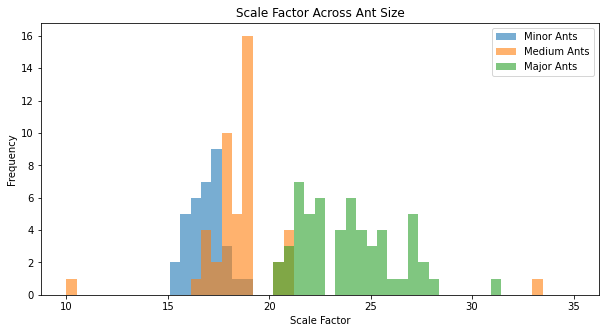

In [13]:
n_bins = 20
bins = np.linspace(10, 35, 50)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(min_scale_factors, bins, alpha=0.6, label="Minor Ants")
ax.hist(mid_scale_factors, bins, alpha=0.6, label="Medium Ants")
ax.hist(maj_scale_factors, bins, alpha=0.6, label="Major Ants")

ax.set(title="Scale Factor Across Ant Size", xlabel="Scale Factor", ylabel="Frequency")

plt.legend(loc='upper right')

plt.show()

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

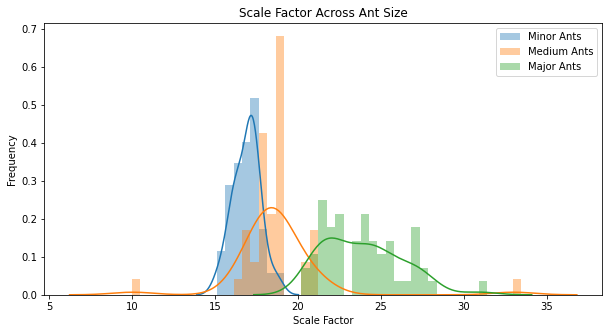

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

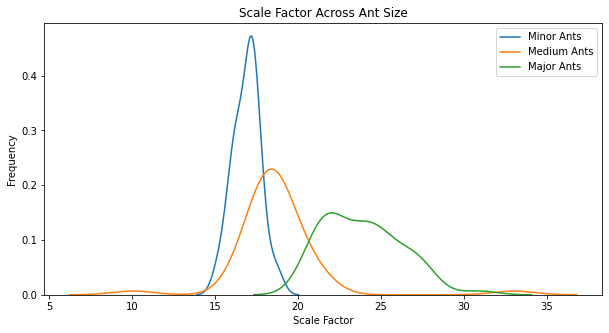

In [14]:
n_bins = 20
bins = np.linspace(10, 35, 50)
fig1, ax1 = plt.subplots(figsize=(10,5))

'''
ax.hist(min_scale_factors, bins, alpha=0.6, label="Minor Ants")
ax.hist(mid_scale_factors, bins, alpha=0.6, label="Medium Ants")
ax.hist(maj_scale_factors, bins, alpha=0.6, label="Major Ants")
'''

sns.distplot(min_scale_factors, bins, label="Minor Ants")
sns.distplot(mid_scale_factors, bins, label="Medium Ants")
sns.distplot(maj_scale_factors, bins, label="Major Ants")

'''
sns.histplot(min_scale_factors, bins=bins, alpha=0.5, kde=True, palette='Set2')
sns.histplot(mid_scale_factors, bins=bins, alpha=0.5, kde=True, palette='hls')
sns.histplot(maj_scale_factors, bins=bins, alpha=0.5, kde=True, palette='hls')
'''

ax1.set(title="Scale Factor Across Ant Size", xlabel="Scale Factor", ylabel="Frequency")

plt.legend(loc='upper right')

plt.savefig('disthist_scale_factors.png')
plt.show()


fig2, ax2 = plt.subplots(figsize=(10,5))

'''
ax.hist(min_scale_factors, bins, alpha=0.6, label="Minor Ants")
ax.hist(mid_scale_factors, bins, alpha=0.6, label="Medium Ants")
ax.hist(maj_scale_factors, bins, alpha=0.6, label="Major Ants")
'''

sns.distplot(min_scale_factors, bins, label="Minor Ants", hist=False)
sns.distplot(mid_scale_factors, bins, label="Medium Ants", hist=False)
sns.distplot(maj_scale_factors, bins, label="Major Ants", hist=False)

'''
sns.histplot(min_scale_factors, bins=bins, alpha=0.5, kde=True, palette='Set2')
sns.histplot(mid_scale_factors, bins=bins, alpha=0.5, kde=True, palette='hls')
sns.histplot(maj_scale_factors, bins=bins, alpha=0.5, kde=True, palette='hls')
'''

ax2.set(title="Scale Factor Across Ant Size", xlabel="Scale Factor", ylabel="Frequency")

plt.legend(loc='upper right')

plt.savefig('dist_scale_factors.png')
plt.show()

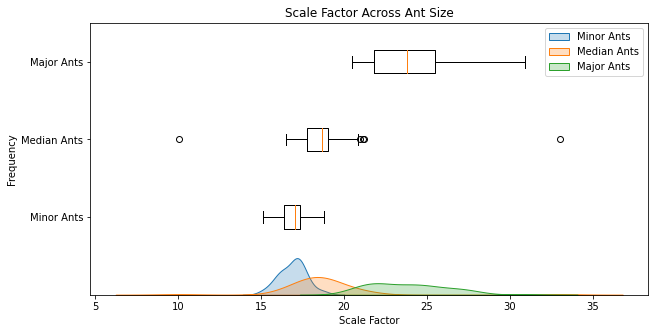

In [11]:
n_bins = 20
bins = np.linspace(10, 35, 50)
fig, ax = plt.subplots(figsize=(10,5))

data = [min_scale_factors, mid_scale_factors, maj_scale_factors]
'''
sns.distplot(min_scale_factors, bins, label="Minor Ants", hist=False)
sns.distplot(mid_scale_factors, bins, label="Medium Ants", hist=False)
sns.distplot(maj_scale_factors, bins, label="Major Ants", hist=False)
'''


sns.kdeplot(min_scale_factors, label="Minor Ants", fill=True)
sns.kdeplot(mid_scale_factors, label="Median Ants", fill=True)
sns.kdeplot(maj_scale_factors, label="Major Ants", fill=True)


ax.boxplot(data, vert=False)



#sns.boxplot(data=data)

#sns.boxplot(min_scale_factors, width=0.1)
#sns.boxplot(mid_scale_factors, width=0.1)
#sns.boxplot(maj_scale_factors, width=0.1)

ax.set(title="Scale Factor Across Ant Size", xlabel="Scale Factor", ylabel="Frequency", 
       yticklabels=["Minor Ants", "Median Ants", "Major Ants"], )

plt.legend(loc='upper right')

plt.savefig("Box_Whisker.png")
plt.show()